# Instructions

1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting,
defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

Group (The DataDriven Team): Susanna Wong, Puja Roy, Mikhail Broomes & Marjete Vucinaj, Danny & Mohammed Rahman

Video : https://drive.google.com/file/d/1sX1cdXH0ZJzS5GzQfC1yxHAZRRTUQCfw/view?usp=sharing

# Corpus

[NLTK](https://www.nltk.org/nltk_data/) has built-in corpora.

[Universal Declaration of Human Rights](https://www.ohchr.org/sites/default/files/UDHR/Documents/UDHR_Translations/eng.pdf)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
nltk.download('udhr')
from nltk.corpus import udhr
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package udhr to /root/nltk_data...
[nltk_data]   Unzipping corpora/udhr.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Data Prepration

The next step is to break down the text into tokens so we count word frequencies. There are 1771 tokens that includes words, numbers and punctuations. These tokens includes duplicates.

In [ ]:
english_udhr = udhr.raw('English-Latin1')
english_tokens = nltk.word_tokenize(english_udhr)

In [ ]:
len(english_tokens)

1771

## Unique Words

Some words can count more than once due to case senstivity. To normalizaed the words, convert all words to lowercase and filter out the punctuations. There are 1585 words (all punctuations dropped) and 478 unique english words in the corpus.

Next, remove the stopwords (is, the, of, are, ...) since they usually do not carry significant meaning. There are 828 english words and 410 unique words (without stopwords).

62 unique words represents half of the total words.

## Unique Words with Stopwords

In [ ]:
english_words = [word.lower() for word in english_tokens if word.isalpha()]
#english_words

In [ ]:
# Total words after removal of punctuations
total_words = len(english_words)
total_words

1585

In [ ]:
len(set(english_words))

478

In [ ]:
fdist1 = nltk.FreqDist(english_words)
fdist1

FreqDist({'the': 110, 'and': 97, 'of': 81, 'to': 80, 'in': 38, 'right': 32, 'article': 29, 'everyone': 29, 'has': 28, 'be': 28, ...})

In [ ]:
word_count = 0
unique_count_half = 0
for word, count in fdist1.most_common():
  word_count += count
  unique_count_half += 1
  if word_count >= total_words/2:
    print(unique_count_half)
    break

27


In [ ]:
num_half_words = total_words/2
num_half_words

792.5

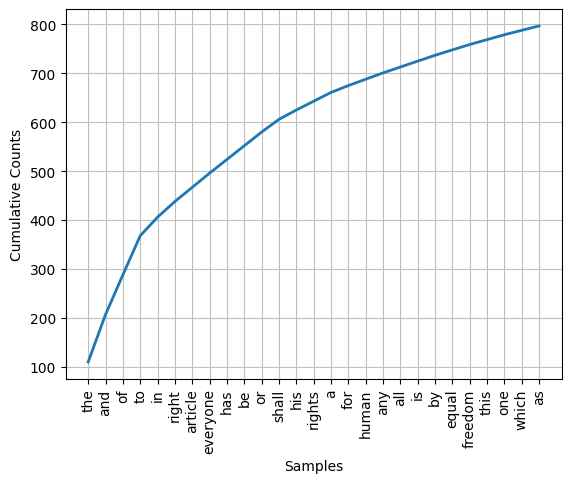

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [ ]:
plt.figure()
fdist1.plot(27, cumulative=True)

## Unique Words without Stopwords

In [ ]:
# Words after removal of stopwords

filtered_words = [word for word in english_words if word not in stopwords.words('english')]
#filtered_words

In [ ]:
# Final total words
total_filtered_words = len(filtered_words)
total_filtered_words

828

In [ ]:
len(set(filtered_words))


410

In [ ]:
fdist2 = nltk.FreqDist(filtered_words)
fdist2

FreqDist({'right': 32, 'article': 29, 'everyone': 29, 'shall': 26, 'rights': 18, 'human': 13, 'equal': 11, 'freedom': 11, 'one': 10, 'entitled': 9, ...})

In [ ]:
word_count = 0
unique_count_half = 0
for word, count in fdist2.most_common():
  word_count += count
  unique_count_half += 1
  if word_count >= total_filtered_words/2:
    print(unique_count_half)
    break

62


In [ ]:
num_half_words = total_filtered_words/2
num_half_words

414.0

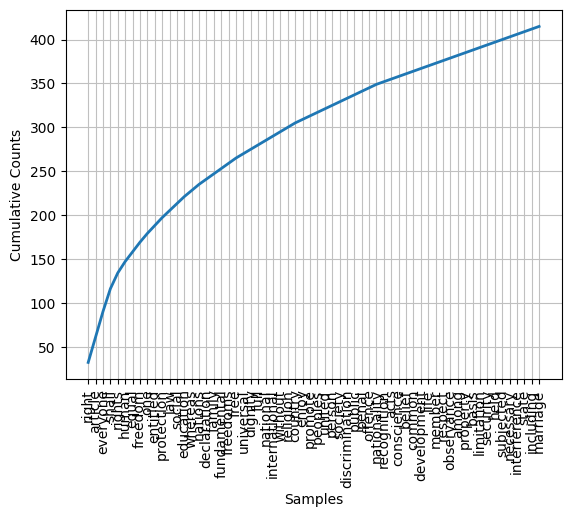

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [ ]:
plt.figure()
fdist2.plot(62, cumulative=True)

# Top 200 Frequent Words

## Top 200 Frequent Words (With Stopwords)

In [ ]:
freq_word = fdist1.most_common(200)

In [ ]:
df1 = pd.DataFrame(freq_word, columns=['Word', 'Frequency'])

print(df1)

          Word  Frequency
0          the        110
1          and         97
2           of         81
3           to         80
4           in         38
..         ...        ...
195   recourse          1
196       last          1
197     resort          1
198  rebellion          1
199    tyranny          1

[200 rows x 2 columns]


In [ ]:
df1['Relative Frequency'] = df1['Frequency']/total_words
df1

,Word,Frequency,Relative Frequency
0,the,110,0.069401
1,and,97,0.061199
2,of,81,0.051104
3,to,80,0.050473
4,in,38,0.023975
...,...,...,...
195,recourse,1,0.000631
196,last,1,0.000631
197,resort,1,0.000631
198,rebellion,1,0.000631


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

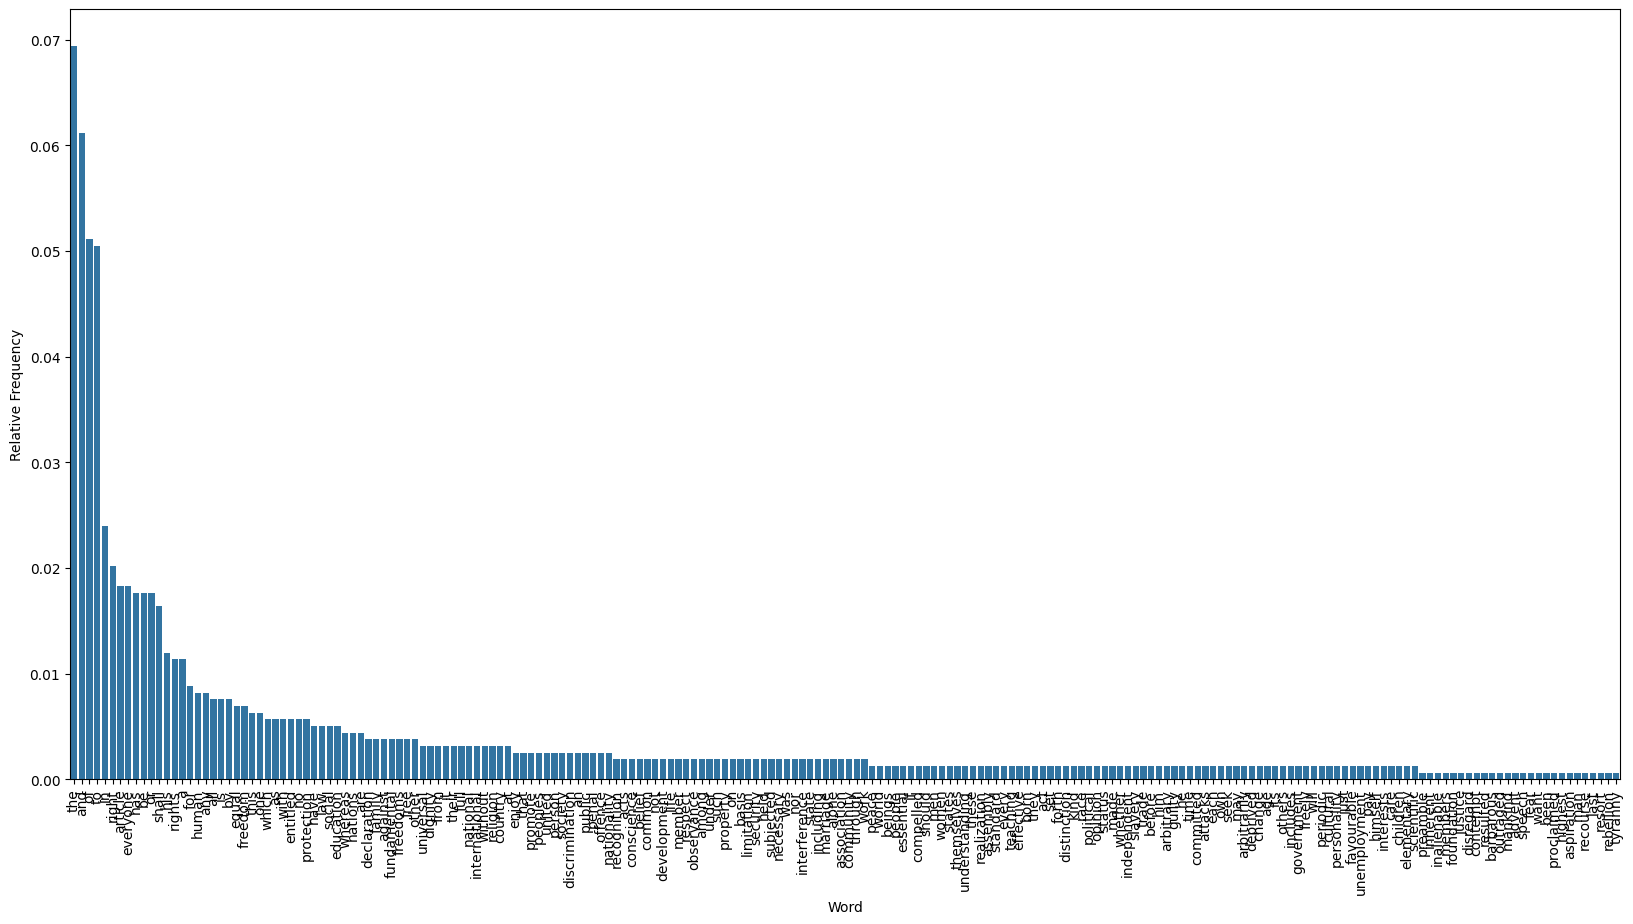

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'Word', y = 'Relative Frequency', data = df1)
plt.xticks(rotation=90)

## Top 200 Frequent Words (Without Stopwords)

In [ ]:
freq_word = fdist2.most_common(200)

In [ ]:
df2 = pd.DataFrame(freq_word, columns=['Word', 'Frequency'])

print(df2)

               Word  Frequency
0             right         32
1           article         29
2          everyone         29
3             shall         26
4            rights         18
..              ...        ...
195           birth          1
196     furthermore          1
197  jurisdictional          1
198       territory          1
199         belongs          1

[200 rows x 2 columns]


In [ ]:
df2['Relative Frequency'] = df2['Frequency']/total_filtered_words
df2

,Word,Frequency,Relative Frequency
0,right,32,0.038647
1,article,29,0.035024
2,everyone,29,0.035024
3,shall,26,0.031401
4,rights,18,0.021739
...,...,...,...
195,birth,1,0.001208
196,furthermore,1,0.001208
197,jurisdictional,1,0.001208
198,territory,1,0.001208


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

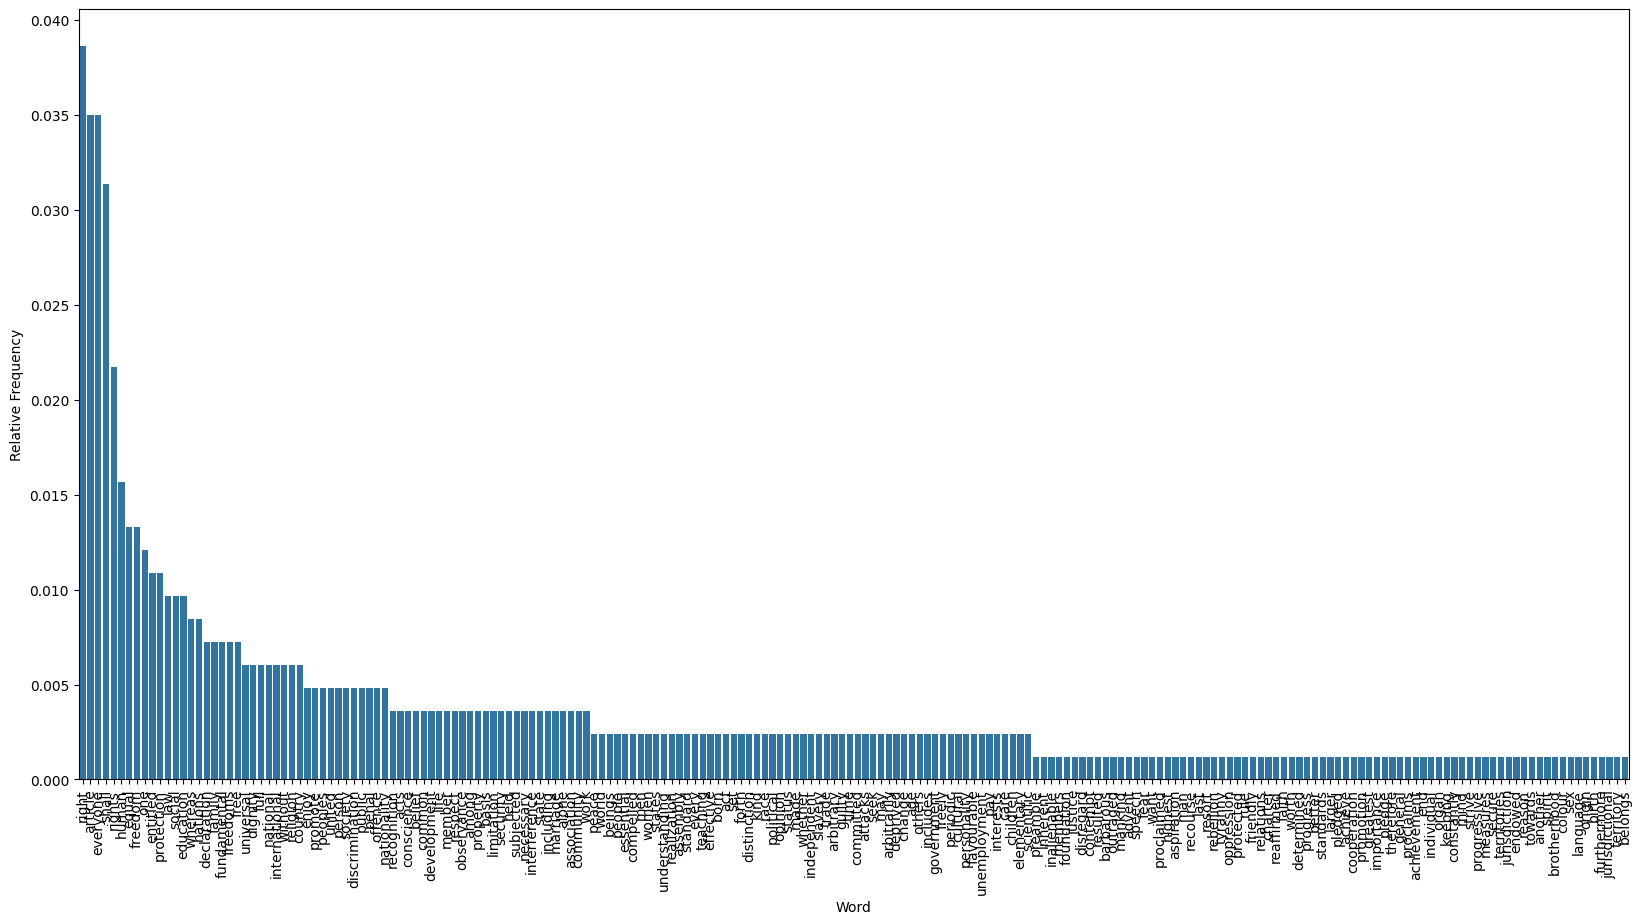

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'Word', y = 'Relative Frequency', data = df2)
plt.xticks(rotation=90)

# [Zipf's Law](https://www.geeksforgeeks.org/zipfs-law/#)



According to our textbook, "Zipf’s Law states that the frequency of a word type is inversely
proportional to its rank (i.e., f × r = k, for some constant k)." From the plot above, it roughly follows the pattern of y = 1/x.

In [ ]:
df1['Rank']=df1.index+1
df1['zipf_frequency'] = df1['Frequency']*(1/df1['Rank'])
df1

,Word,Frequency,Relative Frequency,Rank,zipf_frequency
0,the,110,0.069401,1,110.000000
1,and,97,0.061199,2,48.500000
2,of,81,0.051104,3,27.000000
3,to,80,0.050473,4,20.000000
4,in,38,0.023975,5,7.600000
...,...,...,...,...,...
195,recourse,1,0.000631,196,0.005102
196,last,1,0.000631,197,0.005076
197,resort,1,0.000631,198,0.005051
198,rebellion,1,0.000631,199,0.005025


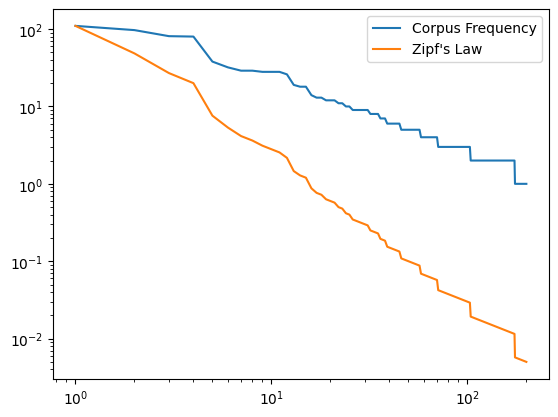

In [ ]:
df1['Rank']=df1.index+1
plt.loglog(df1['Rank'],df1['Frequency'],label='Corpus Frequency')
plt.loglog(df1['Rank'],df1['zipf_frequency'],label="Zipf's Law")
plt.legend()
plt.show()

In [ ]:
df2['Rank']=df2.index+1
df2['zipf_frequency'] = df2['Frequency']*(1/df2['Rank'])
df2

,Word,Frequency,Relative Frequency,Rank,zipf_frequency
0,right,32,0.038647,1,32.000000
1,article,29,0.035024,2,14.500000
2,everyone,29,0.035024,3,9.666667
3,shall,26,0.031401,4,6.500000
4,rights,18,0.021739,5,3.600000
...,...,...,...,...,...
195,birth,1,0.001208,196,0.005102
196,furthermore,1,0.001208,197,0.005076
197,jurisdictional,1,0.001208,198,0.005051
198,territory,1,0.001208,199,0.005025


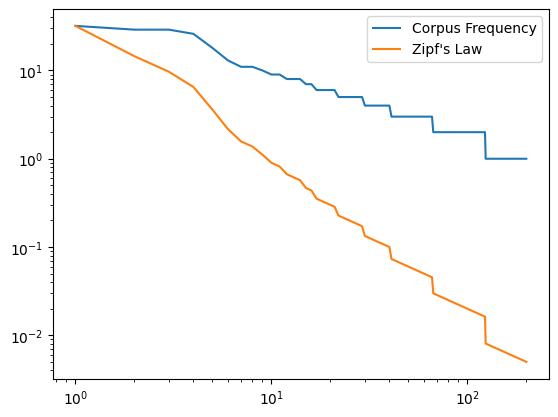

In [ ]:
df2['Rank']=df2.index+1
plt.loglog(df2['Rank'],df2['Frequency'],label='Corpus Frequency')
plt.loglog(df2['Rank'],df2['zipf_frequency'],label="Zipf's Law")
plt.legend()
plt.show()

# Conclusion
Universal Declaration of Human Rights is a legal document that outlines the human rights and freedoms that is to be protected. Disregarding the stopwords the document, the Universal Declaration of Human Rights contains more words related to rights and freedom than in general corpora.